In [1]:
# 导入我们最核心的工具包 pandas，并给它取个别名 pd
import pandas as pd

# 使用pandas的read_csv函数，读取与Notebook在同一个文件夹下的数据文件
df = pd.read_csv('train_V2.csv')

# 打印输出数据的前5行，看看数据长什么样
print("数据前5行预览：")
print(df.head())

数据前5行预览：
               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               

In [2]:
# 使用info()方法，查看数据的整体信息
# 它会告诉我们有多少行、多少列、每一列叫什么名字、是什么数据类型，以及有没有缺失值
print("\n数据基本信息：")
df.info()


数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  win

In [3]:
# 检查 'winPlacePerc' 这一列有多少个缺失值
print(f"winPlacePerc列的缺失值数量: {df['winPlacePerc'].isnull().sum()}")

# 显示那一个存在缺失值的行，看看它长什么样
print("\n缺失值所在行：")
print(df[df['winPlacePerc'].isnull()])

# 由于只有一个缺失值，最简单的处理方法就是直接删除这一行
df.dropna(inplace=True)

# 验证一下是否删除成功 (再次检查缺失值数量，应该为0)
print(f"\n删除后，winPlacePerc列的缺失值数量: {df['winPlacePerc'].isnull().sum()}")

winPlacePerc列的缺失值数量: 1

缺失值所在行：
                     Id         groupId         matchId  assists  boosts  \
2744604  f70c74418bb064  12dfbede33f92b  224a123c53e008        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
2744604          0.0      0              0      0          1  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
2744604           0.0          0           0.0          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
2744604           0.0                0          0           NaN  

[1 rows x 29 columns]

删除后，winPlacePerc列的缺失值数量: 0


In [4]:
# --------------------【修正部分】--------------------
# 在开头导入NumPy库，并简称为np
import numpy as np
# ----------------------------------------------------

# 创建总移动距离 (开车 + 走路 + 游泳)
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# 创建总治疗量 (打急救包 + 喝饮料)
df['healsAndBoosts'] = df['heals'] + df['boosts']

# 创建爆头率
df['headshotRate'] = df['headshotKills'] / df['kills']

# --------------------【优化部分】--------------------
# 你截图中橙色的警告(FutureWarning)建议我们使用下面的写法，这更安全
df['headshotRate'] = df['headshotRate'].fillna(0)
# ----------------------------------------------------

# 将inf(无限大)值替换为0
df.replace([np.inf, -np.inf], 0, inplace=True)

# 【面试加分项】创建一个“原地杀敌”的布尔特征
df['killsWithoutMoving'] = ((df['kills'] > 0) & (df['totalDistance'] == 0))

# 查看我们创建的新特征，确保它们都成功添加了
print("特征工程完成后的数据预览：")
print(df.head())

# 也可以再次检查一下新列的信息
df[['totalDistance', 'healsAndBoosts', 'headshotRate', 'killsWithoutMoving']].info()

特征工程完成后的数据预览：
               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  teamKills  \
0         0.00      0              0      0         60  ...          0   
1        91.47      0              0      0         57  ...          0   
2        68.00      0              0      0         47  ...          0   
3        32.90      0              0      0         75  ...          0   
4       100.00      0              0      0         45  ...          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints winPlacePerc  \
0                0        244.80           

In [5]:
# 让我们选择几个能代表玩家风格的核心行为特征
features_for_clustering = ['kills', 'walkDistance', 'healsAndBoosts', 'weaponsAcquired', 'assists']

# 从我们庞大的df中，提取出这几列，创建一个新的DataFrame专门用于聚类
X_cluster = df[features_for_clustering]

print("用于聚类的特征数据预览：")
print(X_cluster.head())

用于聚类的特征数据预览：
   kills  walkDistance  healsAndBoosts  weaponsAcquired  assists
0      0        244.80               0                1        0
1      0       1434.00               0                5        0
2      0        161.80               0                2        1
3      0        202.70               0                3        0
4      1         49.75               0                2        0


In [6]:
from sklearn.preprocessing import StandardScaler

# 初始化一个标准化处理器
scaler = StandardScaler()

# 对我们的聚类数据进行标准化处理
X_scaled = scaler.fit_transform(X_cluster)

# 标准化后，数据会变成一个NumPy数组，我们看一眼前5行
print("\n标准化后的数据预览：")
print(X_scaled[:5])


标准化后的数据预览：
[[-0.59340161 -0.76841613 -0.63841887 -1.08302132 -0.39725734]
 [-0.59340161  0.23640271 -0.63841887  0.54528317 -0.39725734]
 [-0.59340161 -0.83854728 -0.63841887 -0.6759452   1.30176703]
 [-0.59340161 -0.80398868 -0.63841887 -0.26886907 -0.39725734]
 [ 0.04826381 -0.93322433 -0.63841887 -0.6759452  -0.39725734]]


正在计算最佳K值，请耐心等待...
计算完成！


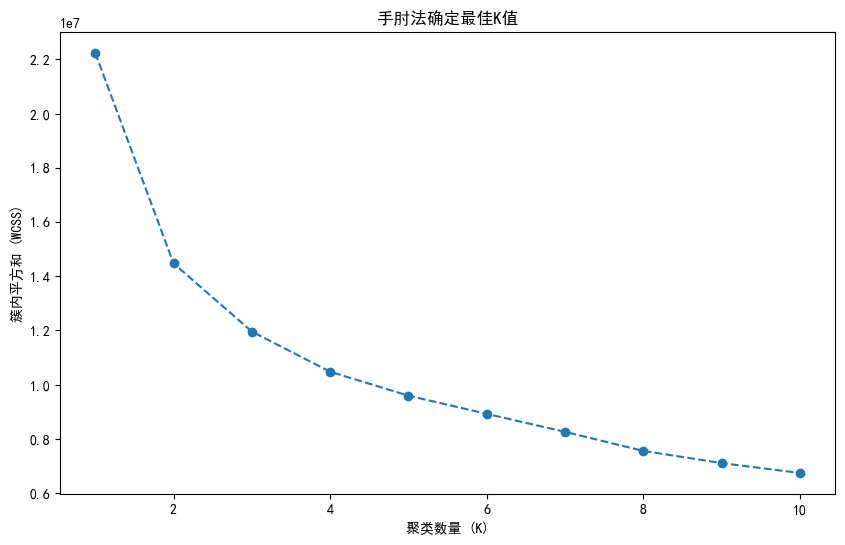

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 【修正部分】 ---
# 在绘图前，配置matplotlib以支持中文显示
# 'SimHei' 是一种常用的黑体中文字体，大部分Windows系统都自带
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# --------------------

# WCSS (Within-Cluster Sum of Squares) 指的是簇内平方和
wcss = []

# 我们尝试K从1到10，看看哪个K值最好
print("正在计算最佳K值，请耐心等待...")
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # 注意这里我们使用标准化后的数据 X_scaled
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print("计算完成！")

# 将结果用图表画出来
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('手肘法确定最佳K值')
plt.xlabel('聚类数量 (K)')
plt.ylabel('簇内平方和 (WCSS)')
plt.show()

In [9]:
# 设定最佳聚类数量为 4
k = 4

# 初始化KMeans模型
kmeans = KMeans(n_clusters=k, random_state=42)

# 使用标准化后的数据进行拟合并预测，得到每个玩家所属的类别
clusters = kmeans.fit_predict(X_scaled)

# 在我们原始的DataFrame中，创建一个新的'cluster'列来存储这个类别标签
df['cluster'] = clusters

# 查看每个类别分别有多少玩家
print("每个类别的玩家数量：")
print(df['cluster'].value_counts())

# 再次预览数据，你会看到最后一列出现了我们打上的标签 (0, 1, 2, 或 3)
print("\n带有聚类标签的数据预览：")
print(df.head())

每个类别的玩家数量：
cluster
0    2369266
1    1337372
2     558396
3     181931
Name: count, dtype: int64

带有聚类标签的数据预览：
               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  vehicleDestroys  \
0         0.00      0              0      0         60  ...                0   
1        91.47      0              0      0         57  ...                0   
2        68.00      0              0      0         47  ...                0   
3        32.90      0              0      0         75  ...                0   
4       100.00      0              0      0         45  ...         

In [10]:
# 回忆一下我们用于聚类的特征
# features_for_clustering = ['kills', 'walkDistance', 'healsAndBoosts', 'weaponsAcquired', 'assists']

# 使用 groupby 和 mean 来计算每个簇的特征均值
# 这会告诉我们每个群体的“平均玩家”是什么样的
cluster_summary = df.groupby('cluster')[features_for_clustering].mean()

# 打印这个总结报告，这是我们解读画像的关键线索！
print("各玩家群体的平均行为特征：")
print(cluster_summary)

各玩家群体的平均行为特征：
            kills  walkDistance  healsAndBoosts  weaponsAcquired   assists
cluster                                                                   
0        0.390120    295.792785        0.452622         2.117634  0.077492
1        0.699545   1882.103300        2.668171         5.338616  0.165259
2        3.137440   2635.440939        9.229024         5.500580  0.355092
3        2.752126   2436.439379        6.712490         5.769270  2.401317


In [11]:
# 我们将最终排名在后10%的玩家定义为“流失风险玩家”（Churn = 1）
df['churn'] = (df['winPlacePerc'] <= 0.1).astype(int)

# 查看一下流失用户和正常用户的比例
print("流失用户比例：")
print(df['churn'].value_counts(normalize=True))

流失用户比例：
churn
0    0.859097
1    0.140903
Name: proportion, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 'y' 就是我们的预测目标 'churn'
y = df['churn']

# 'X' 是用来预测的所有特征
# 我们需要去掉ID类的列、会泄露答案的列(winPlacePerc)和非数值列(matchType)
X = df.drop(columns=['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc', 'churn'])

print("\n用于建模的特征列：")
print(X.columns)


用于建模的特征列：
Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'totalDistance', 'healsAndBoosts', 'headshotRate', 'killsWithoutMoving',
       'cluster'],
      dtype='object')


In [13]:
# 将数据以7:3的比例划分，stratify=y能保证训练集和测试集中流失用户比例与原始数据一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\n训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")


训练集大小: (3112875, 29)
测试集大小: (1334090, 29)


In [14]:
# 初始化逻辑回归模型
model = LogisticRegression(solver='liblinear', random_state=42)

# 使用训练数据来训练模型
print("\n正在训练模型...")
model.fit(X_train, y_train)
print("模型训练完成！")

# 使用训练好的模型对测试集进行预测
y_pred = model.predict(X_test)

# 打印模型的评估报告
print("\n模型评估报告:")
print(classification_report(y_test, y_pred))

# 打印AUC分数，这个分数越高（越接近1），说明模型区分好坏样本的能力越强
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"模型的AUC分数为: {auc:.4f}")


正在训练模型...
模型训练完成！

模型评估报告:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96   1146112
           1       0.78      0.72      0.75    187978

    accuracy                           0.93   1334090
   macro avg       0.87      0.84      0.85   1334090
weighted avg       0.93      0.93      0.93   1334090

模型的AUC分数为: 0.9646


In [16]:
# --------------------【最终章：整合并保存成果】--------------------

# 我们用训练好的模型，为原始数据中的每一个玩家都预测一个流失概率
# 注意：我们用 .predict_proba(X)[:, 1] 来获取属于类别'1'(流失)的概率
all_churn_probabilities = model.predict_proba(X)[:, 1]

# 在我们最完整的 df 数据框中，创建一个新列来存储这个预测概率
df['churn_probability'] = all_churn_probabilities

# 选出我们最终想要在Tableau/Power BI中分析的、最有价值的列
final_columns_to_save = [
    'Id',
    'kills',
    'walkDistance',
    'healsAndBoosts',
    'weaponsAcquired',
    'assists',
    'cluster',  # 我们的聚类标签
    'churn',    # 真实的流失标签
    'churn_probability' # 模型预测的流失概率
]

final_df_for_viz = df[final_columns_to_save]

# --- 【核心保存命令】 ---
# 使用 .to_csv() 函数，将这个最终的数据框保存为本地CSV文件
# index=False 的意思是不要把Pandas的行号也存进去
file_name = 'pubg_analysis_final_output.csv'
final_df_for_viz.to_csv(file_name, index=False)

print(f"任务完成！文件 '{file_name}' 已成功保存。")
print("现在，请按照下一步的指示去寻找它。")

任务完成！文件 'pubg_analysis_final_output.csv' 已成功保存。
现在，请按照下一步的指示去寻找它。
